Load required libraries. For Python 2.7 and Windows Theano will be used/ For Python 2.7 and Linux - TensorFlow

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16 # can take ~30 minutes firts time
import cv2
import numpy as np


Using Theano backend.


Load library to display images

In [ ]:
from IPython.display import Image

In [ ]:
# load the pretrained model
model = VGG16()

Function to wrap calls to pre-trained model and neccessary image transformations

In [ ]:
def recognizeSubject(fileName):
    image = load_img(fileName, target_size=(224, 224))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image)
    # predict the probability across all output classes
    yhat = model.predict(image)
    # convert the probabilities to class labels
    label = decode_predictions(yhat)
    # retrieve the most likely result, e.g. highest probability
    label = label[0][0]
    # print the classification
    print('%s (%.2f%%)' % (label[1], label[2]*100))
    return None

Test the model

In [ ]:
recognizeSubject("./img/cat.png")

In [ ]:
Image("./img/cat.png")

In [57]:
recognizeSubject("./img/veg.png")

head_cabbage (99.98%)


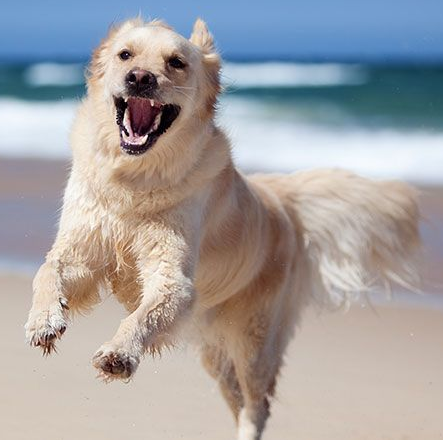

In [58]:
Image("./img/dog.png")

In [59]:
recognizeSubject("./img/dog.png")

golden_retriever (69.96%)


In [60]:
recognizeSubject("./img/marsBar.png")

buckle (6.55%)


In [61]:
recognizeSubject("./img/nestleBar.png")

wallet (46.67%)


Try recongnising Mars Bars with our CNN

In [25]:
from keras.models import load_model

In [32]:
modelCNN = load_model('marsModel65.h5')

In [ ]:
def predictHomeMadeCnn(pathToFile):
    image = cv2.imread(pathToFile)
    image = cv2.resize(image, (48, 48))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    yhat = modelCNN.predict(image)
    print "probability Mars: {}".format(yhat[0][1])
    print "probability notMars: {}".format(yhat[0][0])
    return None

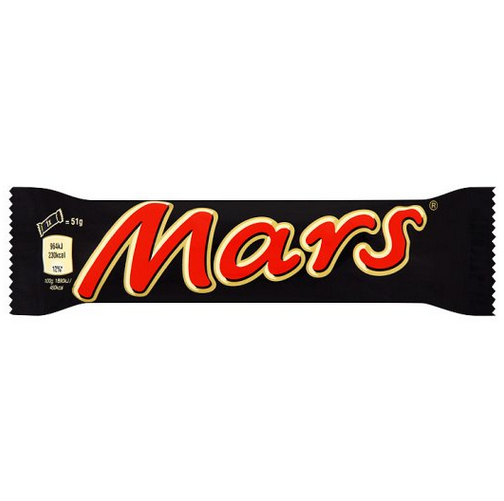

In [75]:
Image("./img/marsBar.png")

In [76]:
predictHomeMadeCnn("./img/marsBar.png")

probability Mars: 1.0
probability notMars: 0.0


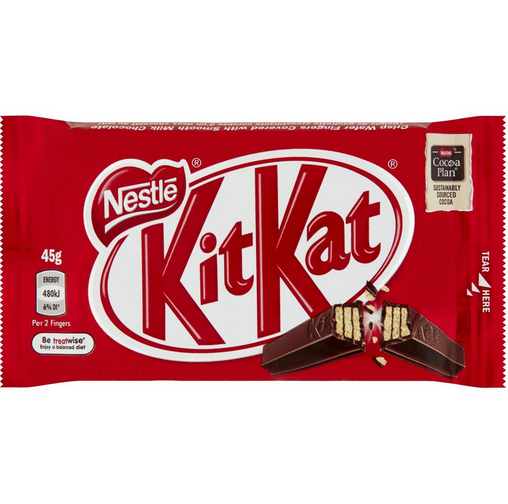

In [77]:
Image("./img/nestleBar.png")

In [ ]:
predictHomeMadeCnn("./img/nestleBar.png")